# GTHA housing market database
# OSEMN methodology Step 2: Scrub
# Step 2.3 addition of new attributes to the Teranet dataset 
# (excluding records with  `consideration_amt` < 10'000)

---

This notebook describes Step 2.3 (part of _Step 2: Scrub_ of OSEMN methodology) performed on the Teranet dataset.

It is identical to the notebook `notebooks/2.scrub/2.3_teranet_new_cols.ipynb`, with the only difference being that prior to the addition of new attributes, **all records with missing `consideration_amt` are removed from the dataset.** In addition, **all values of `consideration_amt` less than 10'000 CAD are reset to NaN,** to exclude transactions with unreasonably low `consideration_amt`.

**_Surrogate key_** `transaction_id` is added prior to the removal of any records, so that the keys match between both versions of the Teranet dataset -- the one with unmodified `consideration_amt` and the one where records with `consideration_amt` < 10'000 CAD have been dropped.

Step 2.3 focuses on the addition of several new attributes to the Teranet dataset. Plan for the addition of the new attributes is presented below.

Previous steps included: 

* **Step 2.1:** spatial join between the Teranet points and the polygons of GTHA Dissemination Areas (DAs)
    
    * During step 2.1, Teranet records whose coordinates fall outside of the GTHA boundary (as defined by the DA geometry) have been filtered out (6,803,691 of the original 9,039,241 Teranet records remain in the dataset)
     
    * In addition to that, three new columns (`OBJECTID`, `DAUID`, and `CSDNAME`) derived from DA attributes have been added to each Teranet transaction

    * for details, see `notebooks/2.scrub/2.1_teranet_gtha_spatial_join.ipynb`

* **Step 2.2:** correction for consistency of the Teranet records

    * column names were converted to lower case
    
    * inconsistent capitalizations were fixed for columns
    
        * `municipality`    
        * `street_name`
        * `street_designation`
        * `postal_code` (did not show problems, converted as a preventive measure)
        
    * columns `province` and `street_suffix` were removed from the dataset
    
    * new column `street_name_raw` was created: reserve copy of unmodified `street_name`
    
    * column `street_name` was parsed and cleaned for:
    
        * `postal_code`
        * `unitno`
        * `street_number`
        * `street_direction`
        * `street_designation`
        
    * plots of the count and percentage of missing values per column were produced
    
    * inconsistent entries were fixed in the following columns:
        
        * `street_direction`
        * `street_designation`
        * `municipality`
        * `street_name`
        * `unitno`
        
    * for details, see `notebooks/2.scrub/2.2_teranet_consistency.ipynb`

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.

For background information, description of the Teranet dataset, and its attributes, see `methodology/1.obtain/obtain.pdf`.

For description of _Step 2: Scrub_ of OSEMN methodology, see `methodology/2.scrub/scrub.pdf`.

For description of the cleanup plan for the Teranet dataset, see `methodology/2.scrub/teranet_cleanup_plan.pdf`.

For description of Step 2.1 of the cleanup process, see `notebooks/2.scrub/2.1_teranet_gtha_spatial_join.ipynb`.

For description of Step 2.2 of the cleanup process, see `notebooks/2.scrub/2.2_teranet_consistency.ipynb`.

## Plan for the addition of the new attributes

**All Teranet records with missing `consideration_amt` are removed from the dataset.** The rest of this notebook is identical to the notebook `notebooks/2.scrub/2.3_teranet_new_cols`. **_Surrogate key_** `transaction_id` is added prior to the removal of any records, so that the keys match between both versions of the Teranet dataset -- the one with unmodified `consideration_amt` and the one where records with `consideration_amt` < 10'000 CAD have been dropped.

### Previously added attributes

Previously, the following new attributes were created in the Teranet dataset:

* attributes produced from the spatial join with DA geometry:

    * `objectid`: an identifier for Dissemination Areas (DAs), added as a backup identifier for DAs

    * `dauid`: another identifier for Dissemination Areas, indented to be used as the **_foreign key_** linking Teranet records with DAs (will become the **_primary key_** of DA-level datasets (_e.g.,_ DA-level Census data)
    
    * `csdname`: municipality name according to Census data (DA-level)

These attributes were added to each Teranet record via a spatial join of Teranet points with the polygons of Dissemination Areas (DAs) during Step 2.1 of the cleanup process

* attributes produced during the correction of Teranet records for consistency:

    * `street_name_raw`: unmodified reserve copy of the original `street_name` from the Teranet dataset

### Attributes to be added in this step

In this step, the following attributes will be added to the Teranet dataset:

* surrogate key:

    * `transaction_id`: unique identifier for each Teranet transaction 
    
Essentially, a simple range index, which represents the row number of a record in the full Teranet dataset (filtered to include only GTHA records), ordered by date (from earliest to latest) and `pin`
    
* attributes for display

    * `date_disp`: `registration_date` converted to `datetime.date` data type to exclude the timestamp (original `registration_date` is stored in NumPy's `datetime64` format to allow more efficient datetime operations)
    
    * `price_disp`: `consideration_amt` formatted to include thousands separator (_e.g.,_ '3,455,122') and stored as a string, for display purposes
    
* attributes for record grouping
    
    * `year`: year parsed from `registration_date`, to simplify record grouping
    
    * `year_month`: year and month parsed from `registration_date`, to simplify record grouping
    
    * `year3`: `registration_date` parsed for 3-year intervals (_e.g.,_ '2014-2016'), to simplify record grouping
    
    * `year5`: `registration_date` parsed for 5-year intervals (_e.g.,_ '2012-2016'), to simplify record grouping
    
    * `year10`: `registration_date` parsed for 3-year intervals (_e.g.,_ '2007-2017'), to simplify record grouping
    
    * `xy`: `x` and `y` coordinates concatenated together (_e.g.,_ '43.098324_-79.234235'), can be used to identify and group records by their coordinate pairs
    
* correction of `consideration_amt` for inflation    
    
    * `price_infl`: `consideration_amt` corrected for inflation
    
* exploratory attributes

    * `pin/xy_total_sales`: total records for this `pin`/`xy`

    * `pin/xy_prev_sales`: previous records from this `pin`/`xy` (not counting current transaction)

    * `pin/xy_price_cum_sum`: cumulative price of all records to date from this `pin`/`xy`

    * `pin/xy_price_pct_change`: price percentage change compared to previous record from this `pin`/`xy`

    * `price_da_pct_change`: price percentage change compared to previous record from this DA (by `da_id`)

    * `pin/xy_years_since_last_sale`: years since last sale from this `pin`/`xy`

    * `da_days_since_last_sale`, `da_years_since_last_sale`: days or years since last sale from this DA (by `da_id`)

    * `sale_next_6m/1y/3y`: "looks into the future" to see whether there is another transaction from this `pin`/`xy` within the given time horizon (6 months, 1 year, 3 years)
    

## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import os
from time import time

sns.set()

In [2]:
import sys

sys.path.append('../../src')

from plot_utils import plot_hist

In [3]:
data_path = '../../data/teranet/'
os.listdir(data_path)

['1.1_Teranet_DA.csv',
 '1.3_Teranet_DA_TAZ_PG_FSA.csv',
 '2_Teranet_consistent.csv',
 'parcel16_epoi13.csv',
 '1.2_Teranet_DA_TAZ.csv',
 '4_Teranet_lu_encode.csv',
 '1.4_Teranet_DA_TAZ_FSA_LU_LUDMTI.csv',
 '1.4_Teranet_DA_TAZ_FSA_LU.csv',
 '.ipynb_checkpoints',
 'ParcelLandUse.zip',
 'ParcelLandUse',
 'HHSaleHistory.csv',
 '3_Teranet_nonan_new_cols.csv',
 'GTAjoinedLanduseSales']

## Load Teranet data

In [4]:
t = time()

df = pd.read_csv(data_path + '2_Teranet_consistent.csv',
                 parse_dates=['registration_date'], low_memory=False)
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:,.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 34.38 seconds (0.57 minutes)
with 6,803,691 rows
and 26 columns
-- Column names:
 Index(['transaction_id', 'lro_num', 'pin', 'consideration_amt',
       'registration_date', 'postal_code', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_number', 'x', 'y', 'dauid', 'csduid', 'csdname', 'taz_o', 'fsa',
       'pca_id', 'postal_code_dmti', 'pin_lu', 'landuse', 'prop_code',
       'dmti_lu', 'street_name_raw'],
      dtype='object')


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803691 entries, 0 to 6803690
Data columns (total 26 columns):
transaction_id        6803691 non-null int64
lro_num               6803691 non-null int64
pin                   6803691 non-null int64
consideration_amt     6803691 non-null float64
registration_date     6803691 non-null datetime64[ns]
postal_code           6233365 non-null object
unitno                1572961 non-null object
street_name           6598317 non-null object
street_designation    6522418 non-null object
street_direction      683462 non-null object
municipality          6799681 non-null object
street_number         6594324 non-null object
x                     6803691 non-null float64
y                     6803691 non-null float64
dauid                 6803691 non-null int64
csduid                6803691 non-null int64
csdname               6803691 non-null object
taz_o                 6802552 non-null float64
fsa                   6803691 non-null object
pca_id 

## Reset all values of `consideration_amt` < 10'000 CAD to NaN
All values of `consideration_amt` less than 10'000 CAD are reset to NaN. The boundary of 10'000 CAD has been selected fairly arbitrary, to cut off the spike of records with low values from the distribution of `consideration_amt` (presented below). On the charts below, values of `consideration_amt` greater than 1'000'000 are not displayed, but they are left in the Teranet dataset, only the values with low `consideration_amt` are removed.

#### Distribution of `consideration_amt`, from 0 to 2'000'000 CAD

Saved output plot to results/teranet_price_dist_raw.png


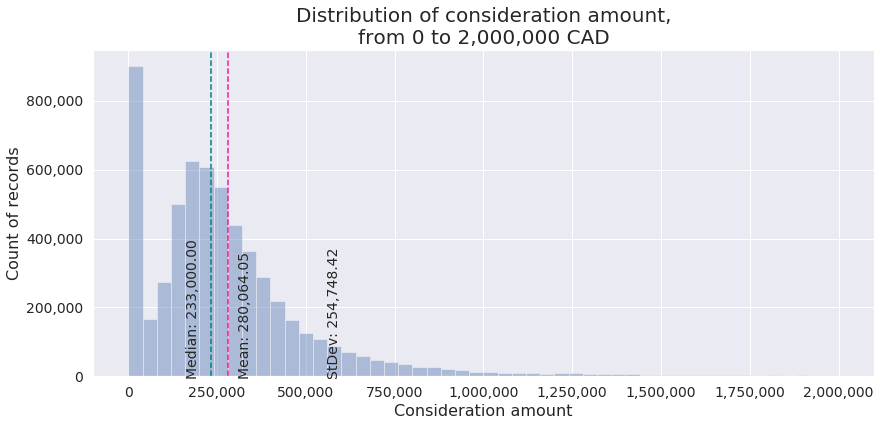

In [6]:
min_price = 0
max_price = 2000000
s = df.query('consideration_amt > @min_price & consideration_amt < @max_price')
plot_hist(s['consideration_amt'], form_x=True, form_y=True, 
          x_label='Consideration amount',
          title="Distribution of consideration amount,\nfrom {0:,} to {1:,} CAD".format(min_price, max_price), 
          sdev_xlift=2, act='save', save_path='results/teranet_price_dist_raw.png', save_only=False)

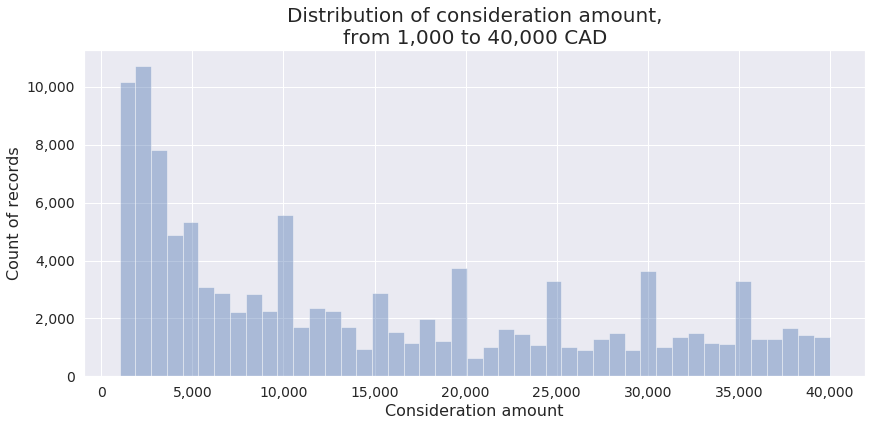

In [7]:
min_price = 1000
max_price = 40000
s = df.query('consideration_amt > @min_price & consideration_amt < @max_price')
plot_hist(s['consideration_amt'], form_x=True, form_y=True, plot_mean=False, plot_median=False, sdev=False, 
          x_label='Consideration amount',
          title="Distribution of consideration amount,\nfrom {0:,} to {1:,} CAD".format(min_price, max_price))

#### Distribution of `consideration_amt`, from 10'000 to 2'000'000 CAD

Saved output plot to results/teranet_price_dist_10k.png


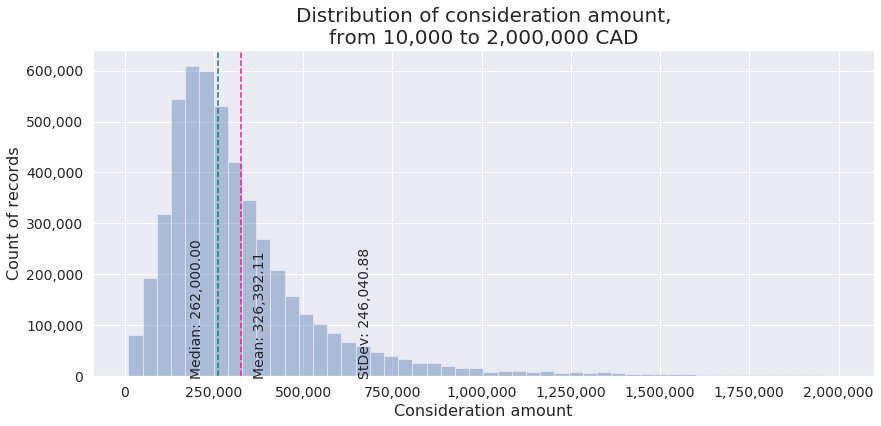

In [8]:
min_price = 10000
max_price = 2000000
s = df.query('consideration_amt > @min_price & consideration_amt < @max_price')
plot_hist(s['consideration_amt'], form_x=True, form_y=True, 
          x_label='Consideration amount',
          title="Distribution of consideration amount,\nfrom {0:,} to {1:,} CAD".format(min_price, max_price), 
          sdev_xlift=2, act='save', save_path='results/teranet_price_dist_10k.png', save_only=False)

#### Reset all values of `consideration_amt` < 10'000 to NaN
To eliminate the spike on the distribution of `consideration_amt` corresponding to records with unreasonably low values, all values of `consideration_amt` < 10'000 are reset to NaN. Records with `consideration_amt` > 2'000'000 are left in the Teranet dataset.

In [9]:
min_price = 10000
mask = df['consideration_amt'] < min_price
df.loc[mask, 'consideration_amt'] = np.nan
print("Values of 'consideration_amt' of all records with price under {0:,} CAD were set to NaN!"
     .format(min_price) + 
      "\n{0:,} values ({1:.2f}% of the total) have been reset to NaN."
      .format(len(df) - df['consideration_amt'].count(),
              (len(df) - df['consideration_amt'].count()) / len(df) * 100) +
      "\n'consideration_amt' now has {0:,} non-null entries."
       .format(df['consideration_amt'].count()))

Values of 'consideration_amt' of all records with price under 10,000 CAD were set to NaN!
1,615,178 values (23.74% of the total) have been reset to NaN.
'consideration_amt' now has 5,188,513 non-null entries.


## Drop all records with missing `consideration_amt`
All records with missing `consideration_amt` are removed from the Teranet dataset.

In [10]:
old_len = len(df)
df = df.dropna(subset=['consideration_amt'])
print("{0:,} records ({1:,.2f}% of the total) with missing 'consideration_amt'"
      .format(old_len - len(df), (old_len - len(df)) / old_len * 100) +
      " have been removed from the dataset.\n{0:,} records remaining."
      .format(len(df)))

1,615,178 records (23.74% of the total) with missing 'consideration_amt' have been removed from the dataset.
5,188,513 records remaining.


In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5188513 entries, 13 to 6803690
Data columns (total 26 columns):
transaction_id        5188513 non-null int64
lro_num               5188513 non-null int64
pin                   5188513 non-null int64
consideration_amt     5188513 non-null float64
registration_date     5188513 non-null datetime64[ns]
postal_code           4881914 non-null object
unitno                1332616 non-null object
street_name           5144061 non-null object
street_designation    5090453 non-null object
street_direction      550657 non-null object
municipality          5187161 non-null object
street_number         5142790 non-null object
x                     5188513 non-null float64
y                     5188513 non-null float64
dauid                 5188513 non-null int64
csduid                5188513 non-null int64
csdname               5188513 non-null object
taz_o                 5188027 non-null float64
fsa                   5188513 non-null object
pca_id

## Add attribute `year`
The new attribute `year` is parsed from `registration_date` and stored as a string, to simplify record grouping.

In [12]:
df['year'] = df['registration_date'].astype('str').apply(lambda x: x[:4])
print("New column 'year' was added to the DataFrame.")

New column 'year' was added to the DataFrame.


## Add attribute `year_month`
The new attribute `year_month` is parsed from `date_disp` and stored as a string, to simplify record grouping.

In [13]:
df['year_month'] = df['registration_date'].astype('str').apply(lambda x: x[:7])
print("New column 'year_month' was added to the DataFrame.")

New column 'year_month' was added to the DataFrame.


## Add attribute `year3`
The new attribute `year3` is created from the column `year` parsed for 3-year intervals (_e.g.,_ '2014-2016') and stored as a string, to simplify record grouping.

In [14]:
t = time()

df['year3'] = df['year']

year_list = df['year'].unique()

i = 0
ylist = []
for year in year_list:
    ylist.append(year)
    i += 1
    if i == 3:
        df['year3'] = df['year3'].str.replace('^' + ylist[0] + '$|^' + ylist[1] + '$|^' + ylist[2] + '$', 
                                              ylist[0] + '-' + ylist[2])
        ylist = []
        i = 0

elapsed = time() - t

print("New column 'year3' was added to the DataFrame. Took {0:,.2f} seconds ({1:.2f} minutes)."
      .format(elapsed, elapsed / 60))
df['year3'].value_counts().sort_index()

New column 'year3' was added to the DataFrame. Took 333.68 seconds (5.56 minutes).


1876-1931        48
1880-1897         8
1883-1911        26
1885-1871        38
1888-1912        69
1889-1873         5
1890-1891        22
1894-1872         5
1895-1903        40
1899-1959       321
1902-1944        54
1906-1940        36
1919-1942        47
1923-1947       116
1924-1882        38
1926-1905        41
1929-1925        73
1930-1918        48
1932-1922        65
1934-1938        45
1936-1955       414
1945-1908        36
1946-1962       566
1948-1969       515
1952-1907       220
1954-1960       846
1956-1961       938
1963-1966      1105
1965-1980      1224
1967-1977      1012
1968-1917       335
1970-1937       577
1972-1884       564
1976-1998    146768
1978-1983      1037
1982-1999    186991
1984-1987     72079
1988-1993    212413
1989-1992    250768
1994-1920    188908
1996-2000    467719
2001-2003    608823
2004-2015    658615
2005-2007    671965
2008-2012    626271
2010-1953    470195
2013-2017    616464
Name: year3, dtype: int64

### Convert column `year` to integer data type

In [15]:
df['year'] = df['year'].astype('int')
print("Data type was converted.")

Data type was converted.


### Add foreign key: `census_year`
A new column `census_year` is added according to determined temporal spans. The temporal span of each Census represents a 5-year interval cetered at the year of the Census. When joining tables in the database, all Teranet records within +/- 2 years from each Census would be matched with variables from that Census.

In [16]:
min_year = 1971
max_year = 2017
census_years = list(range(min_year, max_year + 1, 5))
census_years

[1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006, 2011, 2016]

In [17]:
for census_year in census_years:
    mask1 = census_year - 2 <= df['year']
    mask2 = df['year'] <= census_year + 2
    df.loc[mask1 & mask2, 'census_year'] = census_year
    
df['census_year'].value_counts().sort_index()

1971.0       1731
1976.0       1585
1981.0       2290
1986.0     143171
1991.0     412001
1996.0     630594
2001.0     947029
2006.0    1094074
2011.0    1042168
2016.0     907030
Name: census_year, dtype: int64

### Add foreign key: `census2001_year`
Another foreign key for a table with Census variables, with earliest Census year being 2001.

In [18]:
min_year = 2001
max_year = 2017
census2001_years = list(range(min_year, max_year + 1, 5))
census2001_years

[2001, 2006, 2011, 2016]

In [19]:
for census2001_year in census2001_years:
    mask1 = census2001_year - 2 <= df['year']
    mask2 = df['year'] <= census2001_year + 2
    df.loc[mask1 & mask2, 'census2001_year'] = census2001_year
    
df['census2001_year'].value_counts().sort_index()

2001.0     947029
2006.0    1094074
2011.0    1042168
2016.0     907030
Name: census2001_year, dtype: int64

### Add foreign key: `tts_year`
Another foreign key for a table with TTS variables, with earliest TTS year being 1991.

In [20]:
min_year = 1986
max_year = 2017
tts_years = list(range(min_year, max_year + 1, 5))
tts_years

[1986, 1991, 1996, 2001, 2006, 2011, 2016]

In [21]:
for tts_year in tts_years:
    mask1 = tts_year - 2 <= df['year']
    mask2 = df['year'] <= tts_year + 2
    df.loc[mask1 & mask2, 'tts_year'] = tts_year
    
df['tts_year'].value_counts().sort_index()

1986.0     143171
1991.0     412001
1996.0     630594
2001.0     947029
2006.0    1094074
2011.0    1042168
2016.0     907030
Name: tts_year, dtype: int64

### Add foreign key: `tts1991_year`
Another foreign key for a table with TTS variables, with earliest TTS year being 1991.

In [22]:
min_year = 1991
max_year = 2017
tts1991_years = list(range(min_year, max_year + 1, 5))
tts1991_years

[1991, 1996, 2001, 2006, 2011, 2016]

In [23]:
for tts1991_year in tts1991_years:
    mask1 = tts1991_year - 2 <= df['year']
    mask2 = df['year'] <= tts1991_year + 2
    df.loc[mask1 & mask2, 'tts1991_year'] = tts1991_year
    
df['tts1991_year'].value_counts().sort_index()

1991.0     412001
1996.0     630594
2001.0     947029
2006.0    1094074
2011.0    1042168
2016.0     907030
Name: tts1991_year, dtype: int64

### Add attribute `xy`

The new attribute `xy` is produced by concatenating `x` and `y` together (_e.g.,_ '-79.9774202446447_43.203290987723'), it can be used to identify and group records by their coordinate pairs.

In [24]:
df['xy'] = df['x'].astype('str') + '_' + df['y'].astype('str')
print("New column 'xy' was added to the DataFrame.")

New column 'xy' was added to the DataFrame.


## Correction of `consideration_amt` for inflation

## Exploratory attributes

### Add column `total_sales`
Total records for each pin, generated as a separate DataFrame `df_pin` which represents Teranet records grouped and indexed by `pin`.

`total_sales_pin` is added as a new column for Teranet records via a merge operation on `pin`.

In [25]:
# group records by `pin`
t = time()
pin_counts = df.groupby('pin')['consideration_amt'].count()
pin_counts.name = 'pin_total_sales'
df = pd.merge(df, pin_counts, on='pin')
elapsed = time() - t
print("\nNew column 'pin_total_sales' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

# group records by `xy` coordinate pairs
t = time()
xy_counts = df.groupby('xy')['consideration_amt'].count()
xy_counts.name = 'xy_total_sales'
df = pd.merge(df, xy_counts, on='xy')
elapsed = time() - t
print("\nNew column 'xy_total_sales' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))


New column 'pin_total_sales' added to the DataFrame!
took 54.22 seconds.

New column 'xy_total_sales' added to the DataFrame!
took 40.50 seconds.


### Add column `prev_sales`
New columns are added to Teranet records capturing, for each transaction, a rolling count of previous records from this `pin` or `xy` coordinate pair.

In [26]:
df['count'] = 1 # used to produce rolling counts per `pin` and `xy`

# group by `pin`
t = time()
df['pin_prev_sales'] = df.sort_values(['pin', 'registration_date']).groupby('pin')['count'].cumsum() - 1
elapsed = time() - t
print("\nNew column 'pin_prev_sales' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

# group by xy pairs
t = time()
df['xy_prev_sales'] = df.sort_values(['xy', 'registration_date']).groupby('xy')['count'].cumsum() - 1
elapsed = time() - t
print("\nNew column 'xy_prev_sales' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

df = df.drop('count', axis=1)


New column 'pin_prev_sales' added to the DataFrame!
took 19.07 seconds.

New column 'xy_prev_sales' added to the DataFrame!
took 21.38 seconds.


### Add column `xy_first_sale`
New boolean column `xy_first_sale` is added to each record, True if the record is the earliest one coming from this xy coordinate pair. 

In [29]:
mask1 = df['xy_prev_sales'] == 0
df.loc[mask1, 'xy_first_sale'] = True
df['xy_first_sale'] = df['xy_first_sale'].fillna(False)
df['xy_first_sale'].value_counts()

False    3808087
True     1380426
Name: xy_first_sale, dtype: int64

## Add columns `years_since_last_sale`
New columns are added to Teranet records capturing, for each transaction, years passed since the previous record from this `pin` or `xy` coordinate pair.

In [30]:
t = time()
df['pin_years_since_last_sale'] = \
    df.sort_values(['pin', 'registration_date'])\
      .groupby('pin')['registration_date'].diff().dt.days / 365
elapsed = time() - t
print("New column 'pin_years_since_last_sale' added to the DataFrame!"
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

New column 'pin_years_since_last_sale' added to the DataFrame!
took 1137.16 seconds (18.95 minutes).


In [31]:
t = time()
df['xy_years_since_last_sale'] = \
    df.sort_values(['xy', 'registration_date'])\
      .groupby('xy')['registration_date'].diff().dt.days / 365
elapsed = time() - t
print("New column 'xy_years_since_last_sale' added to the DataFrame!"
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

New column 'xy_years_since_last_sale' added to the DataFrame!
took 659.14 seconds (10.99 minutes).


## Add columns `da_days_since_last_sale` and `da_years_since_last_sale`
New columns are added to Teranet records capturing, for each transaction, years passed since the previous record from this `pin` or `xy` coordinate pair.

In [32]:
# add column 'da_days_since_last_sale' to Teranet records DataFrame 
t = time()
df['da_days_since_last_sale'] = \
    df.sort_values(['dauid', 'registration_date'])\
      .groupby('dauid')['registration_date'].diff().dt.days
elapsed = time() - t
print("New column 'da_days_since_last_sale' added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))
# add column 'da_years_since_last_sale' to Teranet records DataFrame 
t = time()
df['da_years_since_last_sale'] = df['da_days_since_last_sale'] / 365
elapsed = time() - t
print("New column 'da_years_since_last_sale' added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

New column 'da_days_since_last_sale' added to the DataFrame!
took 16.79 seconds.
New column 'da_years_since_last_sale' added to the DataFrame!
took 0.02 seconds.


## Add columns `sale_next_6m/1y/3y` per `pin` and `xy`
New columns are added to Teranet records capturing, for each transaction, whether there would be another transaction in the future from this `pin`, `xy`, or `da_id`

Time horizons used: 6 months, 1 year, 3 years.

In [33]:
# create a new column, marks True if next 'day_diff' <= 5
# group records by `pin`
t = time()
df = df.sort_values(['pin', 'registration_date'])
df['pin_sale_next_6m'] = df['pin_years_since_last_sale'].shift(-1) <= 0.5
df['pin_sale_next_1y'] = df['pin_years_since_last_sale'].shift(-1) <= 1
df['pin_sale_next_3y'] = df['pin_years_since_last_sale'].shift(-1) <= 3
elapsed = time() - t
print("New columns 'pin_sale_next_..' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

New columns 'pin_sale_next_..' added to the DataFrame!
took 10.88 seconds.


In [34]:
# group records by `xy`
t = time()
df = df.sort_values(['xy', 'registration_date'])
df['xy_sale_next_6m'] = df['xy_years_since_last_sale'].shift(-1) <= 0.5
df['xy_sale_next_1y'] = df['xy_years_since_last_sale'].shift(-1) <= 1
df['xy_sale_next_3y'] = df['xy_years_since_last_sale'].shift(-1) <= 3
elapsed = time() - t
print("New columns 'xy_sale_next_..' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

New columns 'xy_sale_next_..' added to the DataFrame!
took 13.82 seconds.


## Price correction for inflation
Transaction prices are corrected for inflation to 2016 prices using the guidelines provided in the [Inflation Calculator](https://www.bankofcanada.ca/rates/related/inflation-calculator/) supplied by the Bank of Canada.

### Load correction coefficients

In [35]:
infl_coefs = pd.read_excel(data_path + '../misc/Infl_adjustment.xlsx')
infl_coefs = infl_coefs.T
infl_coefs.columns = infl_coefs.iloc[0]
infl_coefs = infl_coefs.drop('YEAR')
print(infl_coefs.iloc[0])
infl_coefs = infl_coefs.iloc[:, 0]
infl_coefs

YEAR
Percentage change compared to 2016 prices (X)                            104.92
Inflation adjusted value =                                        ((X/100)+1)*Y
NaN                                              where Y = value to be adjusted
Name: 1985, dtype: object


1985    104.92
1986      97.4
1987     88.47
1988     81.32
1989     72.36
1990     65.09
1991     55.35
1992     53.69
1993     51.17
1994     51.17
1995     47.21
1996     45.06
1997     42.65
1998     41.25
1999     38.97
2000     35.18
2001      30.8
2002     29.23
2003     25.95
2004     22.84
2005     20.77
2006      17.9
2007     15.37
2008     11.87
2009     12.16
2010      11.1
2011      7.76
2012      6.17
2013      4.96
2014      2.54
2015      1.49
2016         0
2017        -1
2018     -3.37
2019     -5.28
Name: Percentage change compared to 2016 prices (X), dtype: object

### Correct consideration amount for inflation

In [36]:
year_list = infl_coefs.index
for year in year_list:
    mask1 = df['year'] == year
    mask2 = df['consideration_amt'].isnull()
    price_raw = df.loc[mask1 & ~mask2, 'consideration_amt']
    df.loc[mask1 & ~mask2, 'price_2016'] = ((infl_coefs[year] / 100) + 1) * price_raw
    print("Corrected prices from {0} for inflation.".format(year))

Corrected prices from 1985 for inflation.
Corrected prices from 1986 for inflation.
Corrected prices from 1987 for inflation.
Corrected prices from 1988 for inflation.
Corrected prices from 1989 for inflation.
Corrected prices from 1990 for inflation.
Corrected prices from 1991 for inflation.
Corrected prices from 1992 for inflation.
Corrected prices from 1993 for inflation.
Corrected prices from 1994 for inflation.
Corrected prices from 1995 for inflation.
Corrected prices from 1996 for inflation.
Corrected prices from 1997 for inflation.
Corrected prices from 1998 for inflation.
Corrected prices from 1999 for inflation.
Corrected prices from 2000 for inflation.
Corrected prices from 2001 for inflation.
Corrected prices from 2002 for inflation.
Corrected prices from 2003 for inflation.
Corrected prices from 2004 for inflation.
Corrected prices from 2005 for inflation.
Corrected prices from 2006 for inflation.
Corrected prices from 2007 for inflation.
Corrected prices from 2008 for inf

## New columns produced from `consideration_amt`

### Add columns `price_cum_sum` and `price_pct_change`
New columns are added to Teranet records capturing, for each transaction, a rolling sum of price from previous records from this `pin` or `xy` coordinate pair, and `pct_change` compared to previous transaction from this `pin` or `xy` pair.

In [37]:
price_col = 'price_2016'

In [38]:
# `price_cum_sum`
# group records by `pin`
t = time()
df['pin_price_cum_sum'] = \
    df.sort_values(['pin', 'registration_date']).groupby('pin')[price_col].cumsum()
elapsed = time() - t
print("\nNew column 'pin_price_cum_sum' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))
# group records by `xy` pairs
t = time()
df['xy_price_cum_sum'] = \
    df.sort_values(['xy', 'registration_date']).groupby('xy')[price_col].cumsum()
elapsed = time() - t
print("\nNew column 'xy_price_cum_sum' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))


New column 'pin_price_cum_sum' added to the DataFrame!
took 10.54 seconds.

New column 'xy_price_cum_sum' added to the DataFrame!
took 17.50 seconds.


In [39]:
# `price_pct_change`
# group records by `pin`
t = time()
df['pin_price_pct_change'] = \
    df.sort_values(['pin', 'registration_date']).groupby('pin')[price_col].pct_change()
elapsed = time() - t
print("\nNew column 'pin_price_pct_change' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))
# group records by `xy`
t = time()
df['xy_price_pct_change'] = \
    df.sort_values(['xy', 'registration_date']).groupby('xy')[price_col].pct_change()
elapsed = time() - t
print("\nNew column 'xy_price_pct_change' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))


New column 'pin_price_pct_change' added to the DataFrame!
took 12.26 seconds.

New column 'xy_price_pct_change' added to the DataFrame!
took 18.33 seconds.


### Add column `price_da_pct_change`
New column is added to Teranet records capturing, for each transaction, percentage change in price compared to the previous record from this `da_id`.

In [40]:
# add column 'price_da_pct_change' to Teranet records DataFrame 
t = time()
df['price_da_pct_change'] = \
    df.sort_values(['dauid', 'registration_date']).groupby('dauid')[price_col].pct_change()
elapsed = time() - t
print("\nNew column 'price_da_pct_change' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))


New column 'price_da_pct_change' added to the DataFrame!
took 11.36 seconds.


### Add columns `price_med_xy` and `price_med_year`
New columns are added to each Teranet record showing its median price (in 2016 dollars) by its xy coordinate pair and by corresponding year (from all coordinate pairs).

New column 'med_price_xy' added to the DataFrame!
took 32.70 seconds.


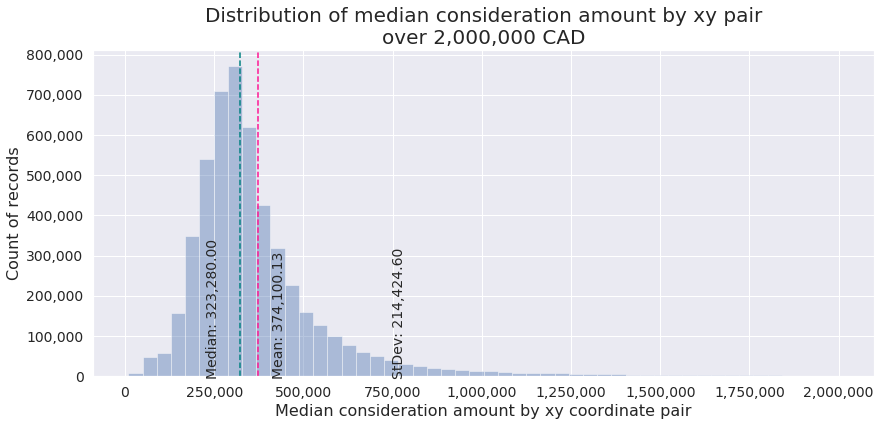

In [41]:
# group records by `xy` coordinate pairs
t = time()
med_price_xy = df.groupby('xy')[price_col].median()
med_price_xy.name = 'med_price_xy'
df = pd.merge(df, med_price_xy, on='xy')
elapsed = time() - t
print("New column 'med_price_xy' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

# plot distribution of the new variable
max_price = 2000000
s = df.query('med_price_xy < @max_price')
plot_hist(s['med_price_xy'], form_x=True, form_y=True, 
          x_label='Median consideration amount by xy coordinate pair',
          title="Distribution of median consideration amount by xy pair"
          "\nover {0:,} CAD".format(max_price), 
          sdev_xlift=2)

New column 'med_price_year' added to the DataFrame!
took 42.27 seconds.


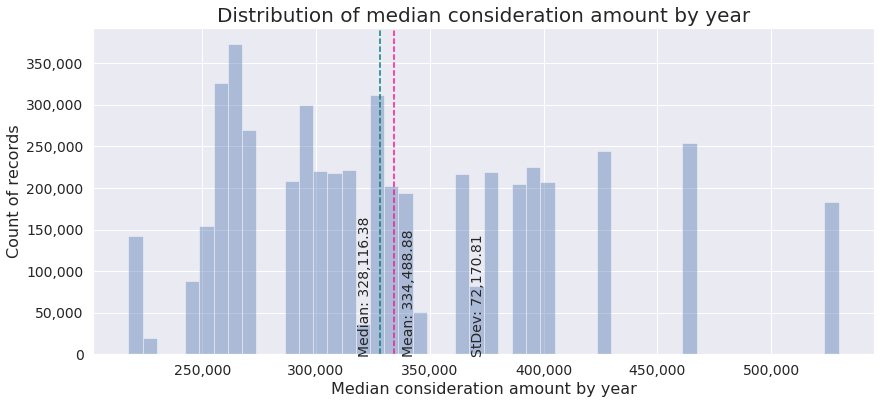

In [42]:
# group records by `xy` coordinate pairs
t = time()
med_price_year = df.groupby('year')[price_col].median()
med_price_year.name = 'med_price_year'
df = pd.merge(df, med_price_year, on='year')
elapsed = time() - t
print("New column 'med_price_year' added to the DataFrame!\ntook {0:.2f} seconds.".format(elapsed))

plot_hist(df['med_price_year'].dropna(), form_x=True, form_y=True, 
          x_label='Median consideration amount by year',
          title="Distribution of median consideration amount by year", 
          mean_xlift=1.01, med_xlift=0.97, sdev_xlift=1.1)

### Add columns `price_to_med_xy` and `price_to_med_year`
New columns are added to each Teranet record showing the ratio of its price (in 2016 dollars) to the median price by its xy coordinate pair and by corresponding year (from all coordinate pairs).

For each Teranet record:

$\texttt{price_to_med_xy} = \large{ \frac{\texttt{price_2016}} {\texttt{price_med_xy}} } $

$\texttt{price_to_med_year} = \large{ \frac{\texttt{price_2016}} {\texttt{price_med_year}} } $

#### Add column `price_to_med_xy`

New column `price_to_med_xy` was added to the DataFrame.


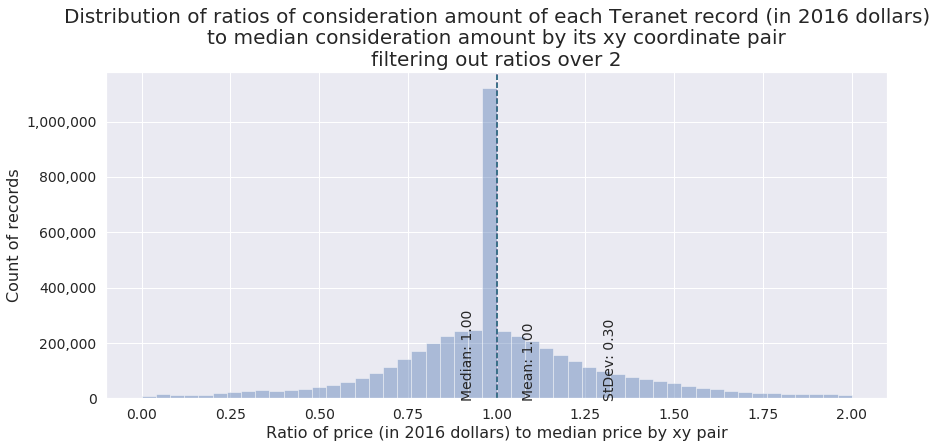

In [43]:
# add new column
df['price_to_med_xy'] = df['price_2016'] / df['med_price_xy']
print("New column `price_to_med_xy` was added to the DataFrame.")

# plot the distribution of the new variable 
max_ratio = 2
s = df.query('price_to_med_xy < @max_ratio')
plot_hist(s['price_to_med_xy'], form_y=True, 
          title="Distribution of ratios of consideration amount of each Teranet record (in 2016 dollars)"
          "\nto median consideration amount by its xy coordinate pair"
          "\nfiltering out ratios over {0}".format(max_ratio),
          x_label="Ratio of price (in 2016 dollars) to median price by xy pair", 
          mean_xlift=1.07, med_xlift=0.9, sdev_xlift=1.3)

##### Filter out records with less than 30 sales per xy coordinate pair (for plotting)

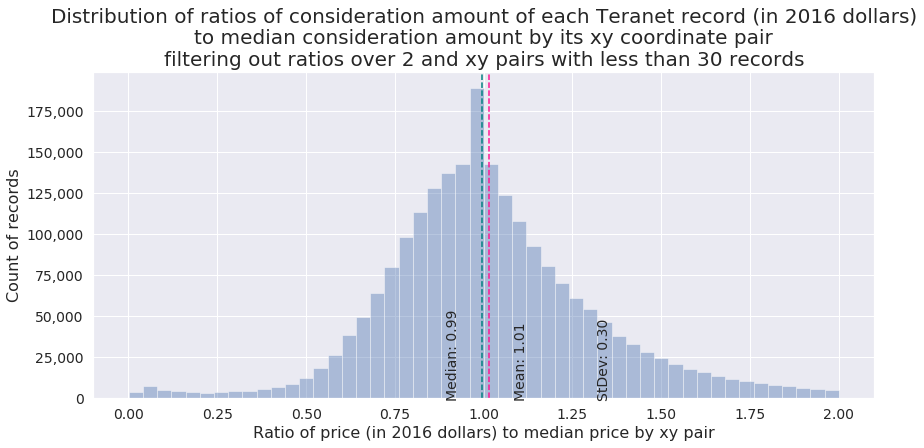

In [44]:
min_total_sales = 30
s = df.query('price_to_med_xy < @max_ratio & xy_total_sales > @min_total_sales')
plot_hist(s['price_to_med_xy'], form_y=True, 
          title="Distribution of ratios of consideration amount of each Teranet record (in 2016 dollars)"
          "\nto median consideration amount by its xy coordinate pair"
          "\nfiltering out ratios over {0} and xy pairs with less than {1} records".format(max_ratio, min_total_sales),
          x_label="Ratio of price (in 2016 dollars) to median price by xy pair", 
          mean_xlift=1.07, med_xlift=0.9, sdev_xlift=1.3)

#### Add column `price_to_med_year`

New column `price_to_med_year` was added to the DataFrame.


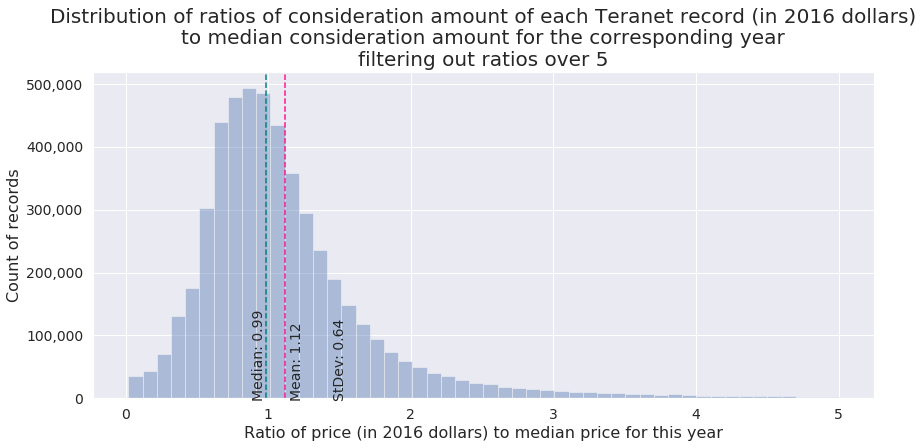

In [45]:
# add new column
df['price_to_med_year'] = df['price_2016'] / df['med_price_year']
print("New column `price_to_med_year` was added to the DataFrame.")

# plot the distribution of the new variable 
max_ratio = 5
s = df.query('price_to_med_year < @max_ratio')
plot_hist(s['price_to_med_year'], form_y=True, 
          title="Distribution of ratios of consideration amount of each Teranet record (in 2016 dollars)"
          "\nto median consideration amount for the corresponding year"
          "\nfiltering out ratios over {0}".format(max_ratio),
          x_label="Ratio of price (in 2016 dollars) to median price for this year", 
          mean_xlift=1.03, med_xlift=0.9, sdev_xlift=1.3)

## Save results to a new .csv file
Teranet dataset without NaN records and with new columns is saved as:
`data/HHSaleHistory_cleaned_v0.9_GTHA_DA_with_cols_v0.9.csv`

In [46]:
df.columns

Index(['transaction_id', 'lro_num', 'pin', 'consideration_amt',
       'registration_date', 'postal_code', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_number', 'x', 'y', 'dauid', 'csduid', 'csdname', 'taz_o', 'fsa',
       'pca_id', 'postal_code_dmti', 'pin_lu', 'landuse', 'prop_code',
       'dmti_lu', 'street_name_raw', 'year', 'year_month', 'year3',
       'census_year', 'census2001_year', 'tts_year', 'tts1991_year', 'xy',
       'pin_total_sales', 'xy_total_sales', 'pin_prev_sales', 'xy_prev_sales',
       'xy_first_sale', 'pin_years_since_last_sale',
       'xy_years_since_last_sale', 'da_days_since_last_sale',
       'da_years_since_last_sale', 'pin_sale_next_6m', 'pin_sale_next_1y',
       'pin_sale_next_3y', 'xy_sale_next_6m', 'xy_sale_next_1y',
       'xy_sale_next_3y', 'price_2016', 'pin_price_cum_sum',
       'xy_price_cum_sum', 'pin_price_pct_change', 'xy_price_pct_change',
       'price_da_pct_change', 'med_price

In [47]:
save_path = data_path + '3_Teranet_nonan_new_cols.csv'
t = time()
df.to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/3_Teranet_nonan_new_cols.csv 
took 405.77 seconds (6.76 minutes).
